In [1]:
import os
import zipfile36 as zipfile 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import tensorflow as tf
tf.__version__

'2.9.1'

In [7]:
os.getcwd()
base_dir = './rpc'
os.chdir(base_dir)

In [8]:
# Let's find out the total number of cat and dog images in the `train` and `validation` directories:

# os.listdir()
os.listdir('train')
os.listdir('train/paper')
os.listdir('train/rock')
os.listdir('train/scissors')

print('total training paper images:', len(os.listdir('train/paper')))
print('total training rock images:', len(os.listdir('train/rock')))
print('total validation scissors images:', len(os.listdir('train//scissors')))
print('total validation paper images:', len(os.listdir('validation/paper')))
print('total validation rock images:', len(os.listdir('validation/rock')))
print('total validation scissors images:', len(os.listdir('validation/scissors')))

total training paper images: 840
total training rock images: 840
total validation scissors images: 840
total validation paper images: 11
total validation rock images: 11
total validation scissors images: 11


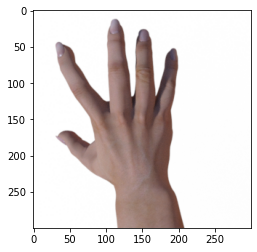

In [9]:
# Retourner ds 1 tableau numpy les pixels de l'image
paper1 = imread('./train/paper/paper01-052.png')
# train_dir+'/paper'+'/cat.0.jpg'
# paper1
# paper1.shape  #  shape  => les dimensions
plt.imshow(paper1)

'validation/paper/paper9.png'

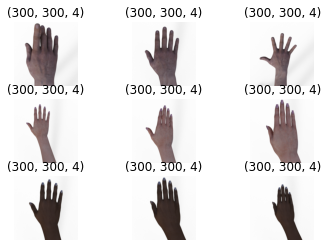

In [10]:
# For both cats and dogs, we have 1,000 training images and 500 test images.

# Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like.

# Une boucle pr afficher plusieurs images dans une figure

for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = 'validation/' + 'paper/' + 'paper' + str(i+1) + '.png'
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)
    plt.axis('Off') # Don't show axes (or gridlines)
filename
# S : On constate que les images sont en mode paysage, mode portrait et de différentes tailles  
# => Ceci peut poser des Pb pour la perfermonce du classifieur. Il nous faut un classifieur robuste !

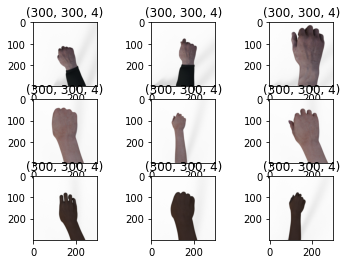

In [11]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = 'validation/' + 'rock/' + 'rock' + str(i+1) + '.png'
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

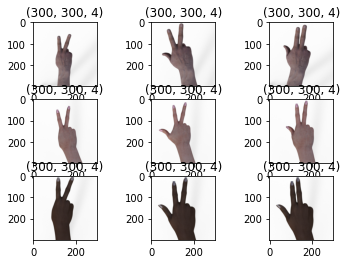

In [12]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    filename = './validation/' + 'scissors/' + 'scissors' + str(i+1) + '.png'
    image = imread(filename)
    plt.imshow(image)
    plt.title(image.shape)

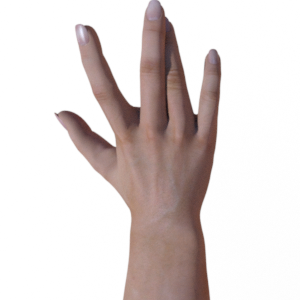

In [13]:
# Manip avec PIL : pkg Python de réf pr le traitement d'image
paper1 = Image.open('./train/paper/paper01-001.png')
paper1
# paper1.show()
# paper1.size
# paper1.mode
# paper1.format
# np.array(paper1)
# imread('train/paper/paper01-001.png')

# paper1 = tf.keras.preprocessing.image.load_img('train/paper/paper01-001.png')
# paper1
# paper1_ = tf.keras.preprocessing.image.img_to_array(paper1)
# paper1_

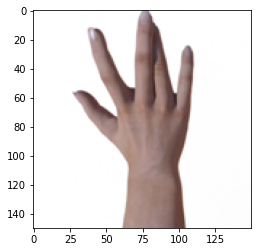

In [14]:
paper1sz = paper1.resize((150, 150))
# paper1sz
paper1sz_ = tf.keras.preprocessing.image.img_to_array(paper1sz)
paper1sz_
paper1sz_sc = paper1sz_ * 1./255
# paper1sz_
tf.keras.preprocessing.image.array_to_img(paper1sz_sc)
plt.imshow(paper1sz_sc)

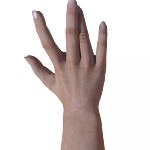

In [15]:
tf.keras.preprocessing.image.load_img('train/paper/paper01-003.png', target_size=(150, 150))

In [16]:
# Q : Comment  injecter les images depuis l'arborescence des dossiers sources dans le CNN (sans passer par des étapes manuelles - preprocessing : normalisation, resizing, augmentation, ...) ?

# R : Ns devons construire 'train_datagen' et 'val_datagen' à l'aide de tf.keras.preprocessing.image.ImageDataGenerator

# Explication :
# Cette classe permet de :
	# i) lire les images depuis l'arborescence,
	# ii) Convertir les images en tensors float32,
	# iii) Injecter avec les labels associés ds le CNN suivant un batch (par ex 20) après les avoir resizer (taille 150x150).


# Par la suite, nous pouvons utiliser les méthodes .flow(), .flow_from_directory(), .flow_from_dataframe()
# Ces generators peuvent être utilisés dans les modeles convolutifs : fit_generator, evaluate_generator, predict_generator

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [17]:
train_gen = train_datagen.flow_from_directory(
    'train', # path du train 
    target_size=(150, 150), 
    batch_size=3, 
    class_mode='categorical', 
    seed = 42
)

Found 2520 images belonging to 3 classes.


In [18]:
val_gen = val_datagen.flow_from_directory(
    'validation', 
    target_size=(150, 150), 
    batch_size=3, 
    class_mode='categorical',
    seed = 42
)

Found 33 images belonging to 3 classes.


In [19]:
# train_gen.n 	# nb d'images
# S : 2000
# train_gen.class_indices
# {'paper': 0, 'rock': 1,'scissors': 2}
# val_gen.classes 
# train_gen.labels 	# cette info est la plus intéressante parce que ns allons l'utiliser pr construire la matrice de confusion
# train_gen.labels.shape 	# cette info est la plus intéressante parce que ns allons l'utiliser pr construire la matrice de confusion
# array([0, 0, 0, ..., 1, 1, 1])

# train_gen.batch_size 	# nb d'images à envoyer (lot)
# 20

train_gen.directory
train_gen.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [20]:
type(val_gen)

keras.preprocessing.image.DirectoryIterator

In [21]:
train_batches = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory='train', target_size=(224,224), class_mode='categorical', batch_size=10)

Found 2520 images belonging to 3 classes.


In [22]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [23]:
# Visualiser les images resizés et rescalés
imgs, labels = next(train_batches)
# labels
imgs
# len(train_batches)

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [150.061  , 137.22101, 130.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [150.061  , 137.22101, 130.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

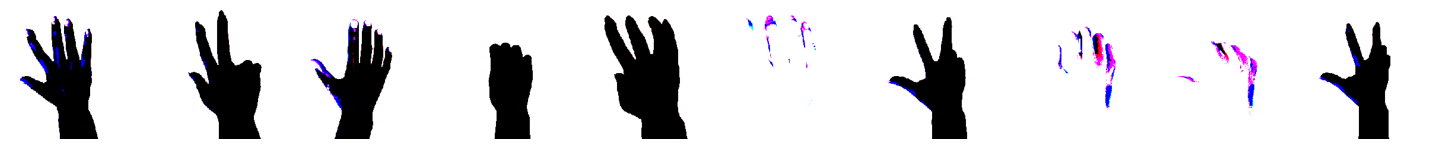

In [24]:
plotImages(imgs)

In [25]:
labels

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [26]:
# Ds le cadre du df data2 : x1, x2 comme features
inputs = tf.keras.layers.Input(shape=(2, ))

In [27]:
# Maintenant, ns travaillons sur des images, ns indiquons 
# les dim de l'image => (heigth, width, mode)
# del model

inputs = tf.keras.layers.Input(shape=(150, 150, 3))

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(512, activation='relu')(x)

outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [28]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], 
              optimizer='rmsprop')

In [29]:
history = model.fit(train_gen, epochs=10, steps_per_epoch=20, 
                   validation_data=val_gen, validation_steps=5)

Epoch 1/10
20/20 [==============================] - 5s 222ms/step - loss: 2.2186 - acc: 0.4333 - val_loss: 0.9590 - val_acc: 0.7333
Epoch 2/10
20/20 [==============================] - 4s 198ms/step - loss: 1.0747 - acc: 0.5667 - val_loss: 2.7064 - val_acc: 0.2667
Epoch 3/10
20/20 [==============================] - 4s 208ms/step - loss: 0.8879 - acc: 0.6500 - val_loss: 0.8138 - val_acc: 0.7333
Epoch 4/10
20/20 [==============================] - 4s 200ms/step - loss: 0.7147 - acc: 0.7667 - val_loss: 0.9013 - val_acc: 0.6000
Epoch 5/10
20/20 [==============================] - 4s 208ms/step - loss: 0.4342 - acc: 0.8000 - val_loss: 0.7417 - val_acc: 0.6667
Epoch 6/10
20/20 [==============================] - 4s 199ms/step - loss: 0.3622 - acc: 0.9167 - val_loss: 1.1644 - val_acc: 0.4000
Epoch 7/10
20/20 [==============================] - 4s 214ms/step - loss: 0.2707 - acc: 0.9167 - val_loss: 1.1666 - val_acc: 0.6000
Epoch 8/10
20/20 [==============================] - 4s 201ms/step - loss: 0.

In [30]:
def diagnostic_learning_curves():
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  # Retrieve a list of list results on training and validation data
  # sets for each training epoch
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get number of epochs
  epochs = range(len(acc))

  # Plot training and validation accuracy per epoch
  plt.plot(epochs, acc)
  plt.plot(epochs, val_acc)
  plt.title('Training and validation accuracy')

  plt.figure()

  # Plot training and validation loss per epoch
  plt.plot(epochs, loss)
  plt.plot(epochs, val_loss)
  plt.title('Training and validation loss')

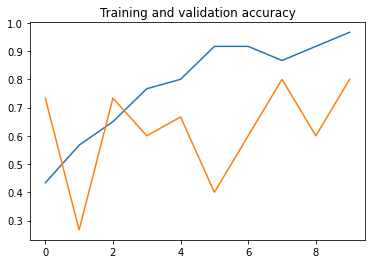

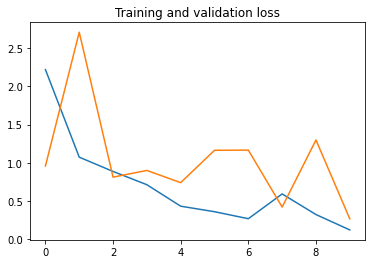

In [31]:
diagnostic_learning_curves()